In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
yemek_kalitesi = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'yemek_kalitesi')
servis_kalitesi = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'servis_kalitesi')
fiyat = ctrl.Antecedent(np.arange(0, 101, 1), 'fiyat')
hijyen = ctrl.Antecedent(np.arange(0, 11, 1), 'hijyen')


overall_rating = ctrl.Consequent(np.arange(0, 101, 1), 'overall_rating')

In [3]:
yemek_kalitesi['kötü']=fuzz.trimf(yemek_kalitesi.universe,[0,0,0.5])
yemek_kalitesi['orta']=fuzz.trimf(yemek_kalitesi.universe,[0,0.5,1])
yemek_kalitesi['iyi']=fuzz.trimf(yemek_kalitesi.universe,[0.5,1,1])

servis_kalitesi['kötü']=fuzz.trimf(servis_kalitesi.universe,[0,0,0.5])
servis_kalitesi['orta']=fuzz.trimf(servis_kalitesi.universe,[0,0.5,1])
servis_kalitesi['iyi']=fuzz.trimf(servis_kalitesi.universe,[0.5,1,1])

fiyat['düsük']=fuzz.trimf(fiyat.universe,[0,0,50])
fiyat['orta']=fuzz.trimf(fiyat.universe,[25,50,75])
fiyat['yüksek']=fuzz.trimf(fiyat.universe,[50,100,100])

hijyen['düsük']=fuzz.trimf(hijyen.universe,[0,0,5])
hijyen['orta']=fuzz.trimf(hijyen.universe,[3,5,7])
hijyen['yüksek']=fuzz.trimf(hijyen.universe,[5,10,10])


overall_rating['düsük'] = fuzz.trimf(overall_rating.universe, [0, 0, 50])
overall_rating['orta'] = fuzz.trimf(overall_rating.universe, [0, 50, 100])
overall_rating['iyi'] = fuzz.trimf(overall_rating.universe, [50, 100, 100])

C:\Users\nursi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nursi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nursi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nursi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


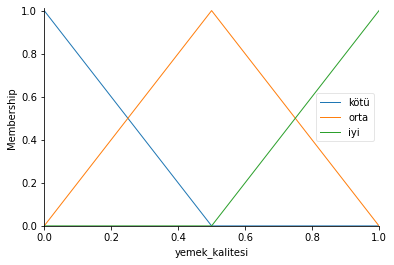

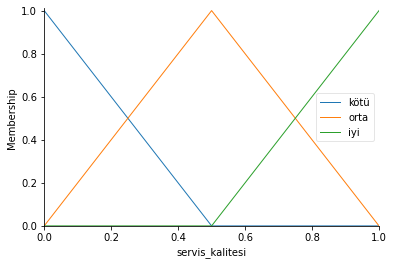

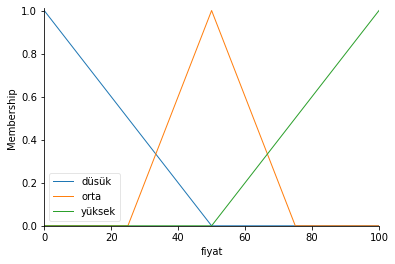

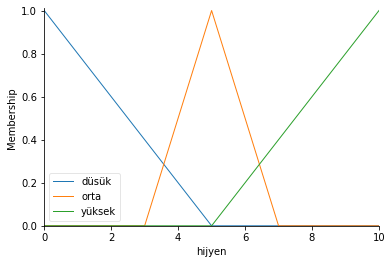

In [4]:
yemek_kalitesi.view()
servis_kalitesi.view()
fiyat.view()
hijyen.view()

In [5]:
rule1 = ctrl.Rule(yemek_kalitesi['iyi'] & servis_kalitesi['iyi'] & fiyat['düsük'] & hijyen['yüksek'], overall_rating['iyi'])
rule2 = ctrl.Rule(yemek_kalitesi['orta'] & servis_kalitesi['orta'] & fiyat['orta'] & hijyen['orta'], overall_rating['orta'])
rule3 = ctrl.Rule(yemek_kalitesi['kötü'] & servis_kalitesi['kötü'] & fiyat['yüksek'] & hijyen['düsük'], overall_rating['düsük'])
rule4 = ctrl.Rule(yemek_kalitesi['iyi'] & servis_kalitesi['iyi'] & fiyat['orta'] & hijyen['yüksek'], overall_rating['iyi'])
rule5 = ctrl.Rule(yemek_kalitesi['orta'] & servis_kalitesi['iyi'] & fiyat['düsük'] & hijyen['orta'], overall_rating['orta'])
rule6 = ctrl.Rule(yemek_kalitesi['kötü'] & servis_kalitesi['orta'] & fiyat['orta'] & hijyen['düsük'], overall_rating['düsük'])
rule7 = ctrl.Rule(yemek_kalitesi['iyi'] & servis_kalitesi['kötü'] & fiyat['yüksek'] & hijyen['orta'], overall_rating['orta'])
rule8 = ctrl.Rule(yemek_kalitesi['orta'] & servis_kalitesi['iyi'] & fiyat['yüksek'] & hijyen['yüksek'], overall_rating['iyi'])
rule9 = ctrl.Rule(yemek_kalitesi['iyi'] & servis_kalitesi['kötü'] & fiyat['düsük'] & hijyen['düsük'], overall_rating['düsük'])
rule10 = ctrl.Rule(yemek_kalitesi['orta'] & servis_kalitesi['orta'] & fiyat['düsük'] & hijyen['orta'], overall_rating['orta'])
rule11 = ctrl.Rule(yemek_kalitesi['kötü'] & servis_kalitesi['orta'] & fiyat['yüksek'] & hijyen['düsük'], overall_rating['düsük'])
rule12=ctrl.Rule(yemek_kalitesi['iyi'] & servis_kalitesi['orta'] & fiyat['orta'] & hijyen['yüksek'], overall_rating['iyi'])
rule13=ctrl.Rule(yemek_kalitesi['orta'] & servis_kalitesi['orta'] & fiyat['düsük'] & hijyen['yüksek'], overall_rating['iyi'])
rule14=ctrl.Rule(yemek_kalitesi['kötü'] & servis_kalitesi['kötü'] & fiyat['düsük'] & hijyen['düsük'], overall_rating['düsük'])
rule15=ctrl.Rule(yemek_kalitesi['kötü'] & servis_kalitesi['orta'] & fiyat['yüksek'] & hijyen['düsük'], overall_rating['düsük'])




In [15]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                  rule10, rule11, rule12, rule13,rule14,rule15])

# Define simulation
rating = ctrl.ControlSystemSimulation(rating_ctrl)


In [7]:
rating.input['yemek_kalitesi'] = 0.3
rating.input['servis_kalitesi'] = 0.1
rating.input['fiyat'] = 27
rating.input['hijyen'] = 2


Performans değerlendirmesi : düsük
Overall rating: 20.416666666666657


C:\Users\nursi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


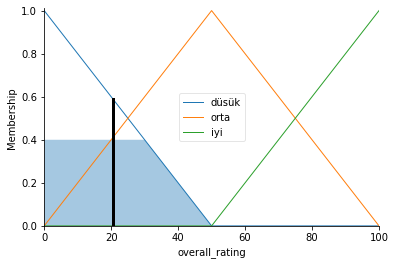

In [8]:
rating.compute()

result_np = rating.output['overall_rating']
# Pandas Series oluşturma
result_pd = pd.Series(result_np, dtype=str)

# Değerleri kontrol edip mutfak türlerine göre sınıflandırma
for i, value in enumerate(result_pd):
    value = float(value)  # Değeri float'a çeviriyoruz
    if 0 <= value < 50:
        result_pd[i] = 'düsük'
    elif 25 <= value < 75:
        result_pd[i] = 'orta'
    else:
        result_pd[i] = 'yüksek'

print("Performans değerlendirmesi :",result_pd[i])


# Get the output value
output_rating = rating.output['overall_rating']
print("Overall rating:", output_rating)
overall_rating.view(sim=rating)